<a href="https://colab.research.google.com/github/RuonaE/Data-Analyst-Portfolio/blob/main/Bike_rentals_prediction_with_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of the Dataset

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., US



# Problem Statement

The objective of this project is to develop a model to Predict  daily bike rental count based on the environmental and seasonal factors.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/bike-dataset hour.csv")


# Exploratory Data Analysis(EDA)

In [ ]:
# Explore the dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  int64  
 10  temp        15595 non-null  float64
 11  atemp       15595 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,15595.000000,15595.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,1.425283,0.496451,0.475300,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.639357,0.192580,0.171928,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Checking for missing values
data.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


-- **Data Preprocessing**



The temperature and atemp column had missing values,I filled the missing values by computing the median.

In [ ]:
# Handling Missing value
# data['temp'] = data['temp'].fillna(method='bfill') # Fill the missing values in the temperature column
# data.head(20)
# data['atemp'] = data['atemp'].fillna(method='bfill') # Fill the missing values in the atemperature column
# data.head(20) #displays first 20 rows

data['temp'] = data['temp'].fillna(data['temp'].median())
data['atemp'] = data['atemp'].fillna(data['atemp'].median())

Created a new column "Peak" to indicate periods with high bike rental demands based on the hours and working days.

In [ ]:
# Create a column that indicates if it is a peak time or not
data['peak'] = 0
data.loc[((data['hr'] >= 7) & (data['hr'] <= 9)) & (data['workingday'] == 'Yes'), 'peak'] = 1   #if the value falls within 7-9AM on working day,create period field displaying peak time
data.loc[((data['hr'] >= 16) & (data['hr'] <= 19)) & (data['workingday'] == 'Yes'), 'peak'] = 1  #if the value falls within 4-7PM on working day, create period field displaying peak time
data.loc[((data['hr'] >= 10) & (data['hr'] <= 16)) & (data['workingday'] == 'No'), 'peak'] = 1   #if the value falls within 10AM-4PM on non working day,create period field displaying peak time
data.head(5) #displays first 40 rows displaying period column.

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,peak
0,1,1/1/2011,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0,3,13,16,0
1,2,1/1/2011,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0,8,32,40,0
2,3,1/1/2011,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0,5,27,32,0
3,4,1/1/2011,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0,3,10,13,0
4,5,1/1/2011,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0,0,1,1,0


Dropped columns that are  not relevant  to simplify the analysis.

In [ ]:
data = data.drop(columns=['yr', 'mnth', 'dteday', 'casual', 'registered','instant']) #drop the unnecessary columns
data.head(1) # displaying first row

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,peak
0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0,16,0


The 'workingday' is a categorical variable so I used label encoding to transform it to numerical variable so it can be fitted by the machine learing model.

In [ ]:
# Transform categorical variable to numerical variable
features_to_label_encode = ["workingday"]
for f in features_to_label_encode:
    data['workingday'] = sklearn.preprocessing.LabelEncoder().fit_transform(data['workingday'])
    print(data.head(10))

   season  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  \
0       1   0        0        6           0           1  0.24  0.2879  0.81   
1       1   1        0        6           0           1  0.22  0.2727  0.80   
2       1   2        0        6           0           1  0.22  0.2727  0.80   
3       1   3        0        6           0           1  0.24  0.2879  0.75   
4       1   4        0        6           0           1  0.24  0.2879  0.75   
5       1   5        0        6           0           2  0.24  0.2576  0.75   
6       1   6        0        6           0           1  0.22  0.2727  0.80   
7       1   7        0        6           0           1  0.20  0.2576  0.86   
8       1   8        0        6           0           1  0.24  0.2879  0.75   
9       1   9        0        6           0           1  0.32  0.3485  0.76   

   windspeed  cnt  peak  
0     0.0000   16     0  
1     0.0000   40     0  
2     0.0000   32     0  
3     0.0000   13     0  


**Feature Selection and Splitting**

In [ ]:
# Separate features (x) and target (y)
X = data.drop(columns=['cnt'])  # Exclude target variable
y = data['cnt']

In [ ]:
# Divide the dataset into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply the same preprocessing steps to the test dataset
X_test_processed = data(X_test)  # Replace `preprocess_function` with your specific preprocessing pipeline


TypeError: 'DataFrame' object is not callable

**Model Training and Comparison**
- Trained and Evaluated two Regression models: Linear Regression and Random Forest.
 Linear Regression model assumes a linear relationship between the target variable(Count) and the features variable.

Random Forest

In [ ]:
#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [ ]:
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


**Evaluate Model's Performance**

In [ ]:
#Calculate Metrics
# Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)


In [ ]:
# R-Squared
r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)


In [ ]:
# Compare Models
print(f"Linear Regression: MSE = {mse_linear}, R2 = {r2_linear}")
print(f"Random Forest: MSE = {mse_rf}, R2 = {r2_rf}")


Linear Regression: MSE = 12113.069230922516, R2 = 0.6174668599053816
Random Forest: MSE = 5035.65884543482, R2 = 0.8409728902009489


In [ ]:
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance)


       Feature  Importance
10        peak    0.405791
1           hr    0.233781
6         temp    0.093641
8          hum    0.063911
0       season    0.062395
7        atemp    0.044664
9    windspeed    0.035329
3      weekday    0.024054
5   weathersit    0.023716
4   workingday    0.009405
2      holiday    0.003312


# Visualizing the Results

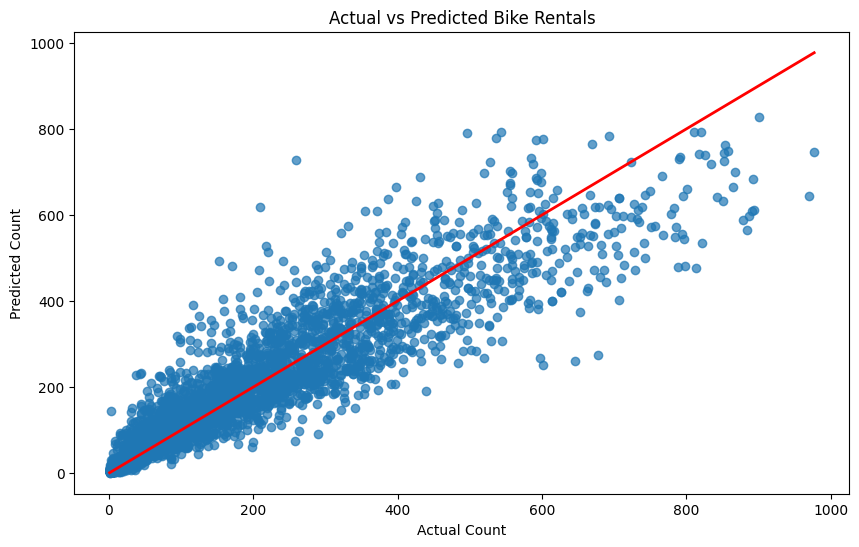

In [ ]:
# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Bike Rentals')
plt.show()


The  scatter plot above shows a positive correlation which means the predicted count aligns with the actual count. It implies that the model performed well.

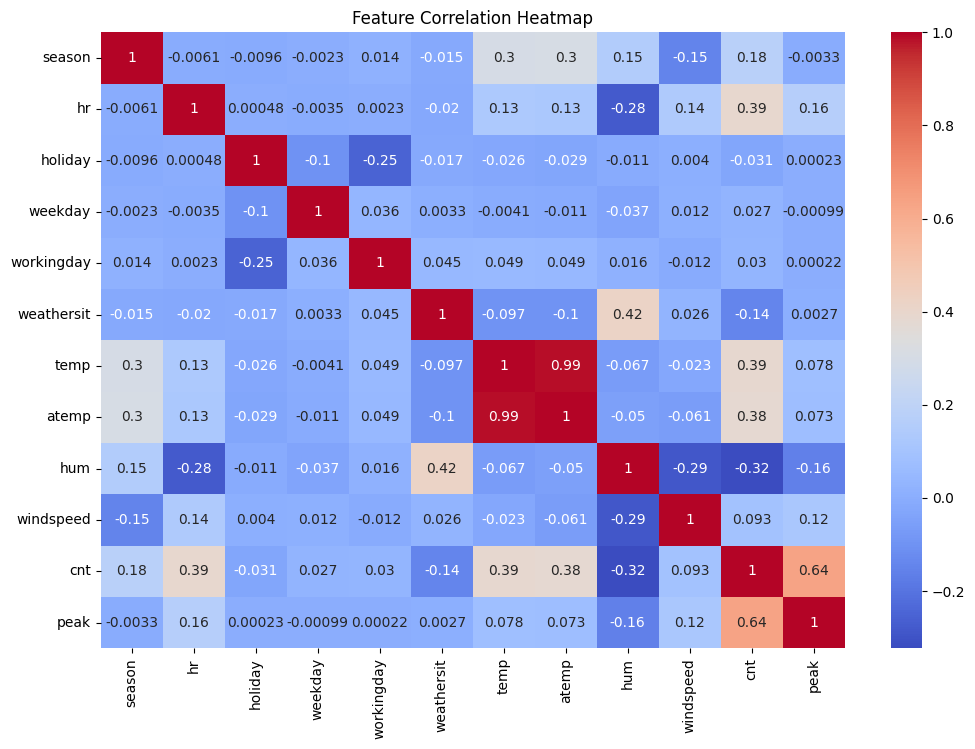

In [ ]:
# Correlation heatmap for feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


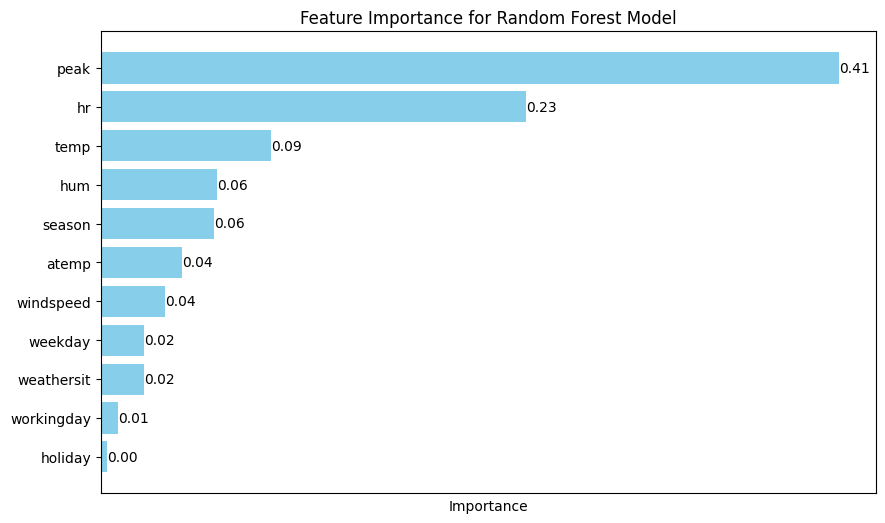

In [ ]:
# Visualizing feature importance with labels on bars and no x-axis labels
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Add labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center')

plt.xlabel('Importance')
plt.xticks([])  # Remove x-axis labels
plt.show()


# Conclusions
